# <font color=Blue>Intro to Data Exploration</font>
---

### Steps Covered
    1.Understanding the data
    2.Univariate Analysis
    3.Bi-Variate Analysis
    4.Outlier detection
    5.Feature Scaling
    6.Missing value Imputation

In [1]:
# We can use the pandas library in python to read in the csv file.
import pandas as pd

#for numerical computations we can use numpy library
import numpy as np

#inline command makes all the charts to appear in notebook else will be created in seperate window
%matplotlib inline

#Use matplotlib and seaborn packages to create beautiful visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This creates a pandas dataframe and assigns it to the df variable.
df = pd.read_csv('deliveries_1.csv')
# Print the first 5 rows of the dataframe.
df.head()

,match_id,year,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,...,0,0,0,0,0,0,0,NaN,NaN,NaN


### 1.Understanding the data

In [3]:
df.shape #number of rows and columns

(136598, 22)

In [4]:
df.columns #names of all the columns

Index([u'match_id', u'year', u'inning', u'batting_team', u'bowling_team',
       u'over', u'ball', u'batsman', u'non_striker', u'bowler',
       u'is_super_over', u'wide_runs', u'bye_runs', u'legbye_runs',
       u'noball_runs', u'penalty_runs', u'batsman_runs', u'extra_runs',
       u'total_runs', u'player_dismissed', u'dismissal_kind', u'fielder'],
      dtype='object')

In [5]:
df.dtypes # datatypes of all the columns

match_id             int64
year                 int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [6]:
df.isnull().sum() # number of missing values in each column

match_id                 0
year                     0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    129871
dismissal_kind      129871
fielder             131727
dtype: int64

**There are 3 types of slicing a dataframe**

In [7]:
#passing just the column
df['bowler'].head(1)

0    P Kumar
Name: bowler, dtype: object

In [8]:
#using .loc (label based indexing) - need to give index and column label
df.loc[0,'bowler']

'P Kumar'

In [9]:
#using .iloc (positional indexing) - give location numbers
df.iloc[0,9]

'P Kumar'

### 2. Univariate Analysis

**For Continuous variables**

In [10]:
df.describe() #statistical measures of all the numerical variables

,match_id,year,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000,136598.000000
mean,288.564679,2012.024407,1.482738,10.144585,3.617125,0.000498,0.037782,0.004978,0.022372,0.004480,0.000073,1.215311,0.069686,1.284997
std,165.929865,2.475356,0.501575,5.673901,1.808200,0.022306,0.260535,0.115512,0.201309,0.074062,0.019132,1.589654,0.353357,1.579014
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145.000000,2010.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,289.000000,2012.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,432.000000,2014.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,577.000000,2016.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [11]:
df['total_runs'].mean()   #avg runs per ball

1.284996852076897

In [12]:
df['ball'].max() #maximum number of balls bowled in a over

9

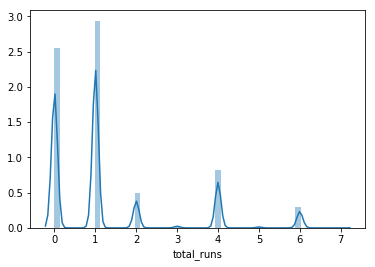

In [13]:
sns.distplot(df['total_runs']) #distribution plot using seaborn package

In [14]:
#skewness and kurtosis
print("Skewness: %f" % df['total_runs'].skew())
print("Kurtosis: %f" % df['total_runs'].kurt())

Skewness: 1.566651
Kurtosis: 1.643257


**For Categorical Variables**

In [15]:
df.describe(include=['O']) #describe function for categorical columns

,batting_team,bowling_team,batsman,non_striker,bowler,player_dismissed,dismissal_kind,fielder
count,136598,136598,136598,136598,136598,6727,6727,4871
unique,13,13,436,431,334,412,9,421
top,Mumbai Indians,Mumbai Indians,V Kohli,G Gambhir,Harbhajan Singh,SK Raina,caught,KD Karthik
freq,16890,16807,3237,3238,2742,123,3954,119


In [16]:
df['batting_team'].value_counts() #Frequency table for the column 'batting_team'

Mumbai Indians                 16890
Royal Challengers Bangalore    16142
Kings XI Punjab                15991
Chennai Super Kings            15754
Delhi Daredevils               15535
Kolkata Knight Riders          15463
Rajasthan Royals               13914
Deccan Chargers                 9034
Sunrisers Hyderabad             7379
Pune Warriors                   5443
Gujarat Lions                   1891
Kochi Tuskers Kerala            1582
Rising Pune Supergiants         1580
Name: batting_team, dtype: int64

### 3. Bivariate Analysis

**Correlation matrix (heat-map style)**

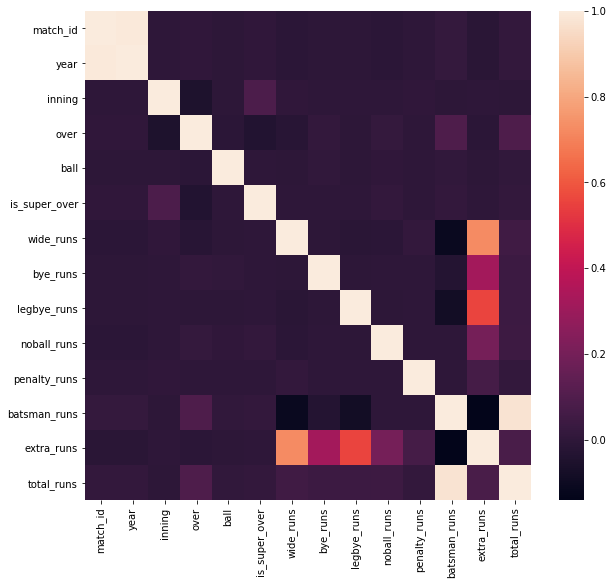

In [17]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10,9)) #Change the size of plot,if this line is removed,you can see a smaller plot of default size
sns.heatmap(corrmat)

**Scatter plots**

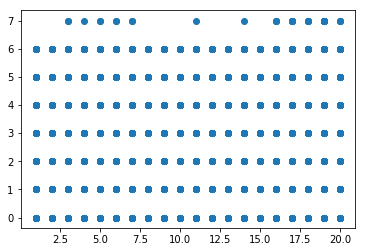

In [18]:
plt.scatter(df['over'],df['total_runs'])

**Data aggregation for better understanding**

In [19]:
grouped = df.groupby('year').agg(sum)
#the column used to groupby will become the new index

In [20]:
grouped

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
year,,,,,,,,,,,,,
2008,396570,19913,134400,49034,0,596,73,372,82,5,16809,1128,17937
2009,1190138,20206,138093,49368,11,523,77,299,78,0,15376,977,16353
2010,2107379,21518,147826,52620,9,639,82,334,74,0,17754,1129,18883
2011,3599353,25163,171283,61543,0,644,121,375,86,0,19928,1226,21154
2012,5077244,26438,182051,64074,0,609,88,371,63,0,21322,1131,22453
2013,6548295,27075,185760,65417,25,591,73,386,65,0,21487,1115,22602
2014,6127701,21244,145730,51548,12,488,67,372,56,5,17943,988,18931
2015,6653516,20162,138162,49542,11,533,52,286,55,0,17427,926,18353
2016,7717162,20820,142425,50946,0,538,47,261,53,0,17963,899,18862


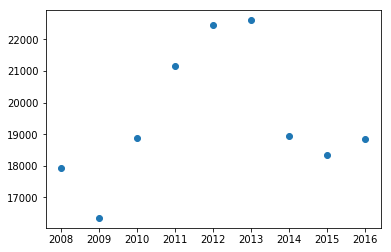

In [21]:
#sample scatter plot
plt.scatter(grouped.index,grouped['total_runs'])

**Two-way table for categorical variables**

In [22]:
pd.crosstab(df['batting_team'],df['bowling_team'])

bowling_team,Chennai Super Kings,Deccan Chargers,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
batting_team,,,,,,,,,,,,,
Chennai Super Kings,0,1242,1947,0,2040,226,1819,2685,734,2069,0,2251,741
Deccan Chargers,1171,0,1338,0,1226,125,1070,1156,485,1111,0,1352,0
Delhi Daredevils,1840,1290,0,227,1983,250,1979,2102,659,1893,249,2092,971
Gujarat Lions,0,0,244,0,232,0,198,235,0,0,240,369,373
Kings XI Punjab,2051,1208,2042,246,0,118,2334,2214,672,1858,237,2038,973
Kochi Tuskers Kerala,219,103,215,0,129,0,248,121,123,171,0,253,0
Kolkata Knight Riders,1881,1112,1995,248,2185,244,0,2137,601,1794,158,2100,1008
Mumbai Indians,2662,1241,2224,252,2152,126,2100,0,731,1915,239,2314,934
Pune Warriors,736,486,622,0,679,123,615,727,0,610,0,616,229


### 4. Outlier Detection

**Box plots are used to find outliers for each variable.<br>
To find multivariate outlier, Use scatter plot**

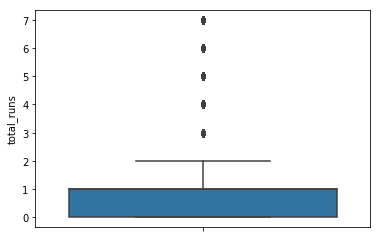

In [23]:
sns.boxplot(df['total_runs'],orient='v')

# 5. Feature Scaling

In [24]:
from sklearn import preprocessing
num_var = ['wide_runs','bye_runs','legbye_runs'] #list of variables to be scaled
scaler = preprocessing.StandardScaler().fit(df[num_var]) #This will store mean and std of required variables in scaler object
df_scaled = scaler.transform(df[num_var])  #Use .transform to use the stored mean and std for normalization
df_scaled = pd.DataFrame(df_scaled,columns=num_var)

In [25]:
df_scaled.head()

,wide_runs,bye_runs,legbye_runs
0,-0.145019,-0.043096,4.856374
1,-0.145019,-0.043096,-0.111134
2,3.693249,-0.043096,-0.111134
3,-0.145019,-0.043096,-0.111134
4,-0.145019,-0.043096,-0.111134


# 6. Missing Value Imputation

The most commonly used methods for missing value imputation are:<br>
1. **Mean, Median** - For Continuous variables<br>
2. **Mode** - For Categorical variables<br>

In [26]:
# Impute the column 'fielder' with mode as it is a categorical column
#check that we wrote .mode()[0] as the mode function returns an array of values
df['fielder'].fillna(df['fielder'].mode()[0],inplace=True) #inplace parameter fills the value in the original dataframe